In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utk-tatp7/UTKFace1/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/26_1_1_20170117153641469.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/26_1_0_20170117174144110.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/67_0_2_20170112224629884.jpg.chip.jpg
/kaggle/input/utk-tatp7/UTKFace1/12_1_0_20170109203700059.jpg.chip.jpg
/kaggl

In [2]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model,Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


In [3]:
path = "../input/utk-lite1/UTKFaceTAT2p2"
images = []
age = []
gender = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [4]:
age = np.array(age,dtype=np.int64)
images = np.array(images)   
gender = np.array(gender,np.uint64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [5]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())              
                           
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age.h5')


2022-06-11 16:53:15.567650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-11 16:53:15.655990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-11 16:53:15.656737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-11 16:53:15.657931: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 512)       1

2022-06-11 16:53:19.184530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-06-11 16:53:20.497836: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


153/153 [==============================] - 19s 73ms/step - loss: 66259.7969 - mae: 39.4856 - val_loss: 442.7531 - val_mae: 16.7350
Epoch 2/50
153/153 [==============================] - 10s 65ms/step - loss: 360.6836 - mae: 15.7781 - val_loss: 872.7479 - val_mae: 25.0285
Epoch 3/50
153/153 [==============================] - 10s 65ms/step - loss: 347.2395 - mae: 15.2615 - val_loss: 307.1696 - val_mae: 14.6932
Epoch 4/50
153/153 [==============================] - 10s 65ms/step - loss: 306.3459 - mae: 14.0716 - val_loss: 283.7391 - val_mae: 13.2307
Epoch 5/50
153/153 [==============================] - 10s 65ms/step - loss: 283.0515 - mae: 13.4341 - val_loss: 623.5037 - val_mae: 21.3509
Epoch 6/50
153/153 [==============================] - 10s 65ms/step - loss: 275.9218 - mae: 13.1756 - val_loss: 250.0513 - val_mae: 12.2279
Epoch 7/50
153/153 [==============================] - 10s 65ms/step - loss: 243.3415 - mae: 12.2606 - val_loss: 225.8397 - val_mae: 11.6005
Epoch 8/50
153/153 [=========

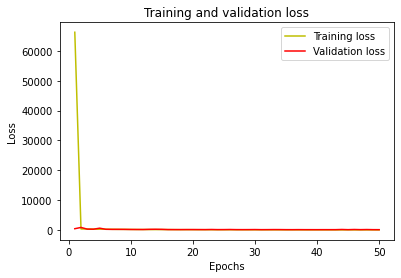

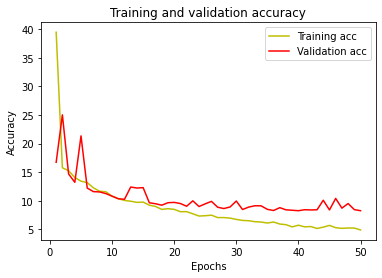

In [6]:
history = history_age

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
#acc = history.history['accuracy']
val_acc = history.history['val_mae']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()